##  Logistic Regression

import the Required libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

### Read the dataset

In [2]:
data = pd.read_csv(r"C:\Users\angaj\Downloads\diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.shape

(768, 9)

### Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# check the null value
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
# just fine data
print("Median :", data['BloodPressure'][7])
print("check of 8 no :", data['BloodPressure'][8])
print("import median value :", data['BloodPressure'].median())

Median : 0
check of 8 no : 70
import median value : 72.0


### Imputation of 0's with the appropriate values in the given features

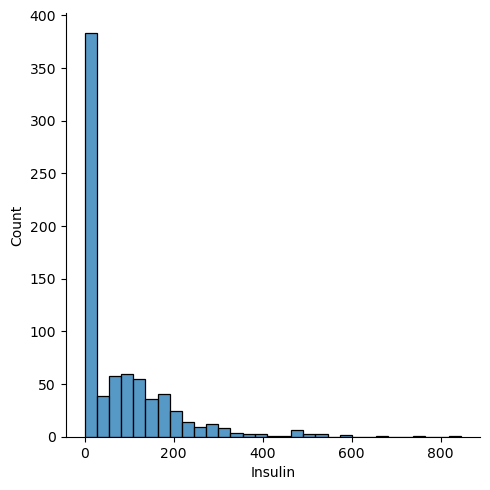

In [9]:
# this is the right skewed distribution -> outliers -> do the imputation of the 0's of the insulin values
sns.displot(data.Insulin)

In [10]:
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())
data['Insulin']

0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

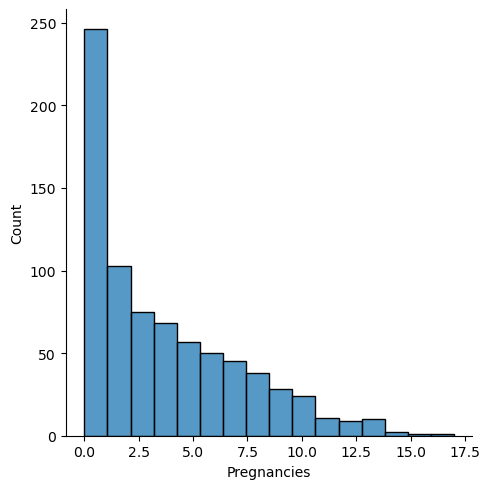

In [12]:
sns.displot(data.Pregnancies)

In [13]:
data['Pregnancies'] = data['Pregnancies'].replace(0, data['Pregnancies'].median())
data['Pregnancies']

0       6
1       1
2       8
3       1
4       3
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

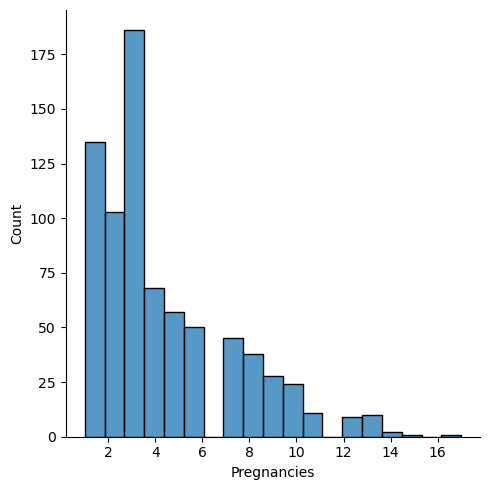

In [14]:
# Now
sns.displot(data.Pregnancies)

In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

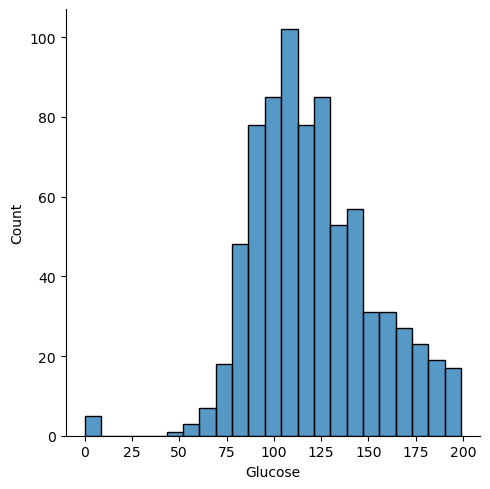

In [16]:
sns.displot(data.Glucose)

In [17]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Glucose']

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

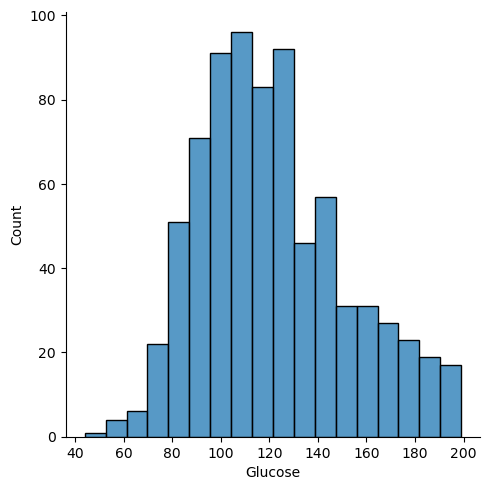

In [18]:
# Now
sns.displot(data.Glucose)

In [19]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

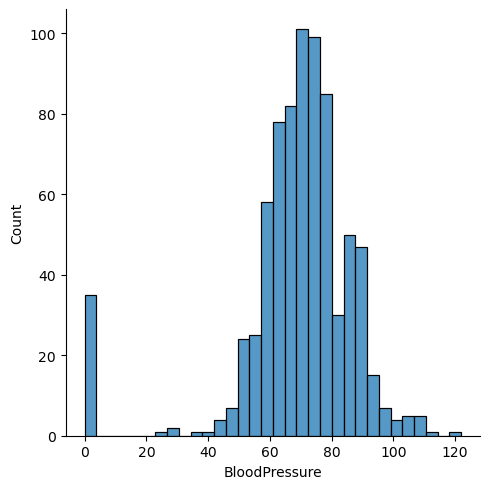

In [20]:
sns.displot(data.BloodPressure)

In [21]:
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())
data['BloodPressure']

0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

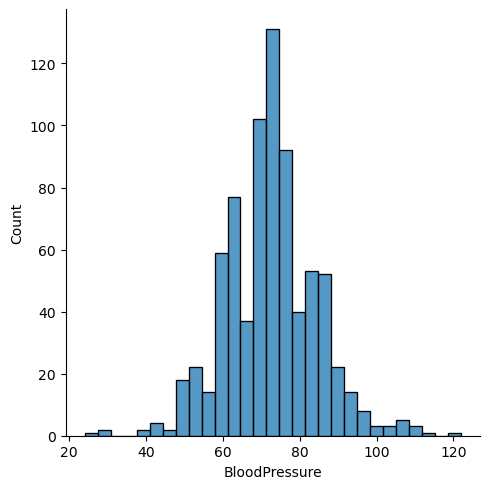

In [22]:
sns.displot(data.BloodPressure)

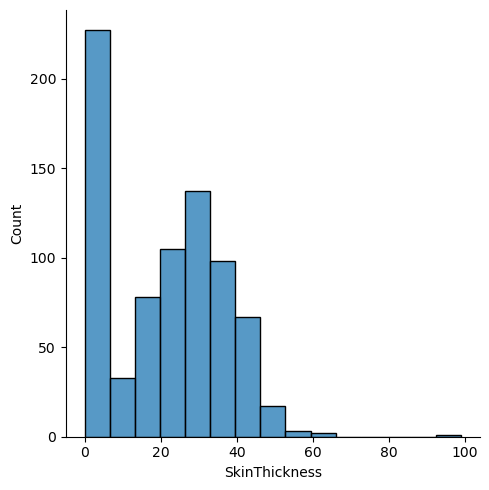

In [23]:
sns.displot(data.SkinThickness)

In [24]:
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].median())
data['SkinThickness']

0      35
1      29
2      23
3      23
4      35
       ..
763    48
764    27
765    23
766    23
767    31
Name: SkinThickness, Length: 768, dtype: int64

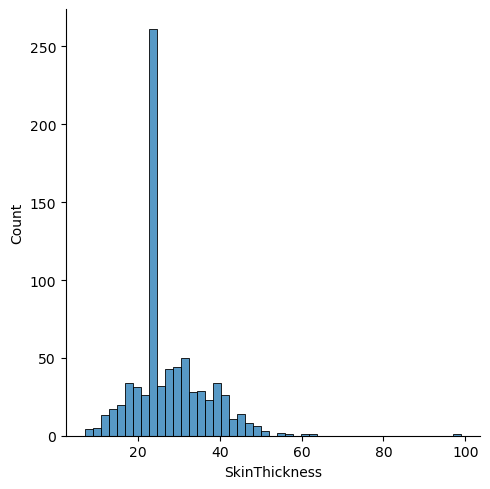

In [25]:
# now
sns.displot(data.SkinThickness)

In [26]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
data['BMI'] = data['BMI'].replace(0, data["BMI"].mean())
data['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

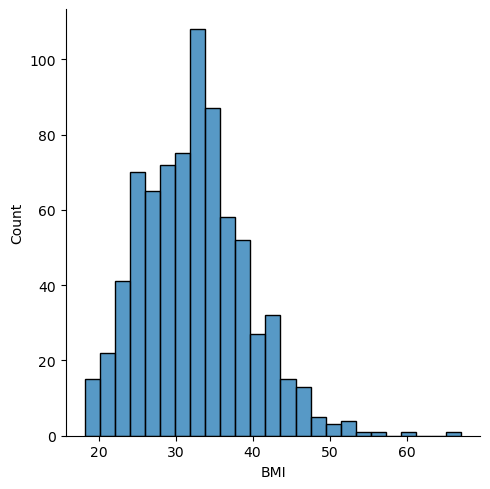

In [28]:
sns.displot(data.BMI)

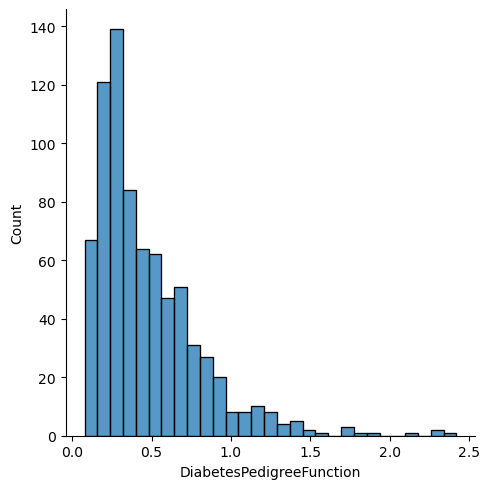

In [29]:
sns.displot(data.DiabetesPedigreeFunction)

### Feature Selection VS Feature Engineering 

#### Correlation Coefficent Selection

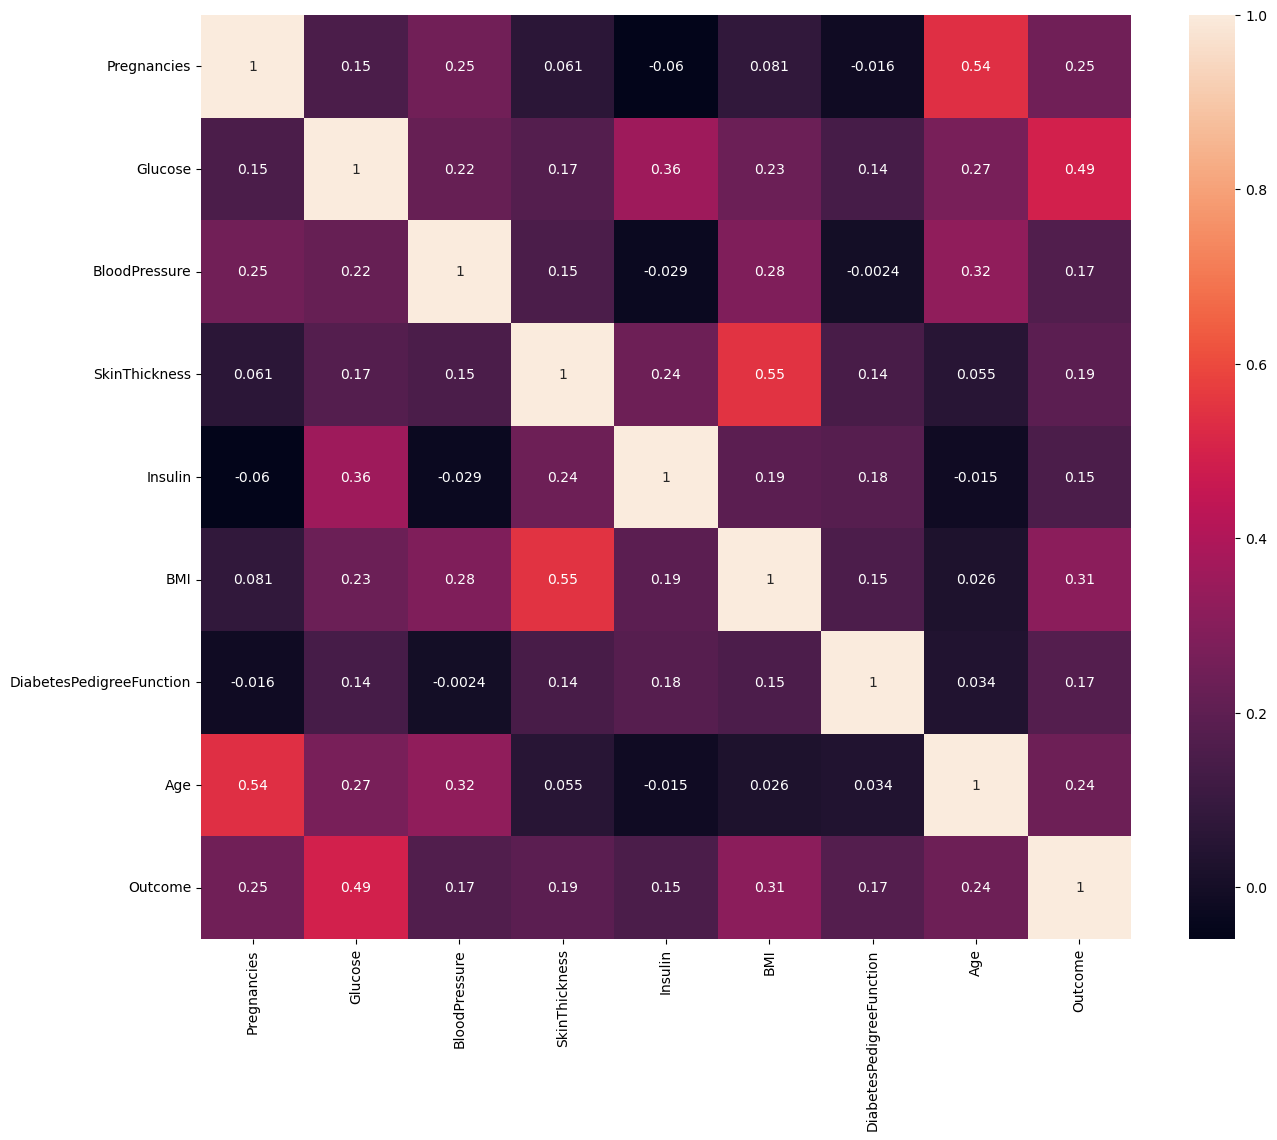

In [30]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True)
plt.savefig('corr.png')
plt.show()

#### Spit the data into input features(X) and target column(y)

In [31]:
x = data.drop(columns='Outcome', axis=1)
y = data['Outcome']

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,30.5,33.6,0.627,50
1,1,85.0,66,29,30.5,26.6,0.351,31
2,8,183.0,64,23,30.5,23.3,0.672,32
3,1,89.0,66,23,94.0,28.1,0.167,21
4,3,137.0,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63
764,2,122.0,70,27,30.5,36.8,0.340,27
765,5,121.0,72,23,112.0,26.2,0.245,30
766,1,126.0,60,23,30.5,30.1,0.349,47


In [33]:
# 0 indicates that the patient is not diabetic and 1 indicates that petient is diabetic
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#### Outliers Detection Box Plot

<Axes: >

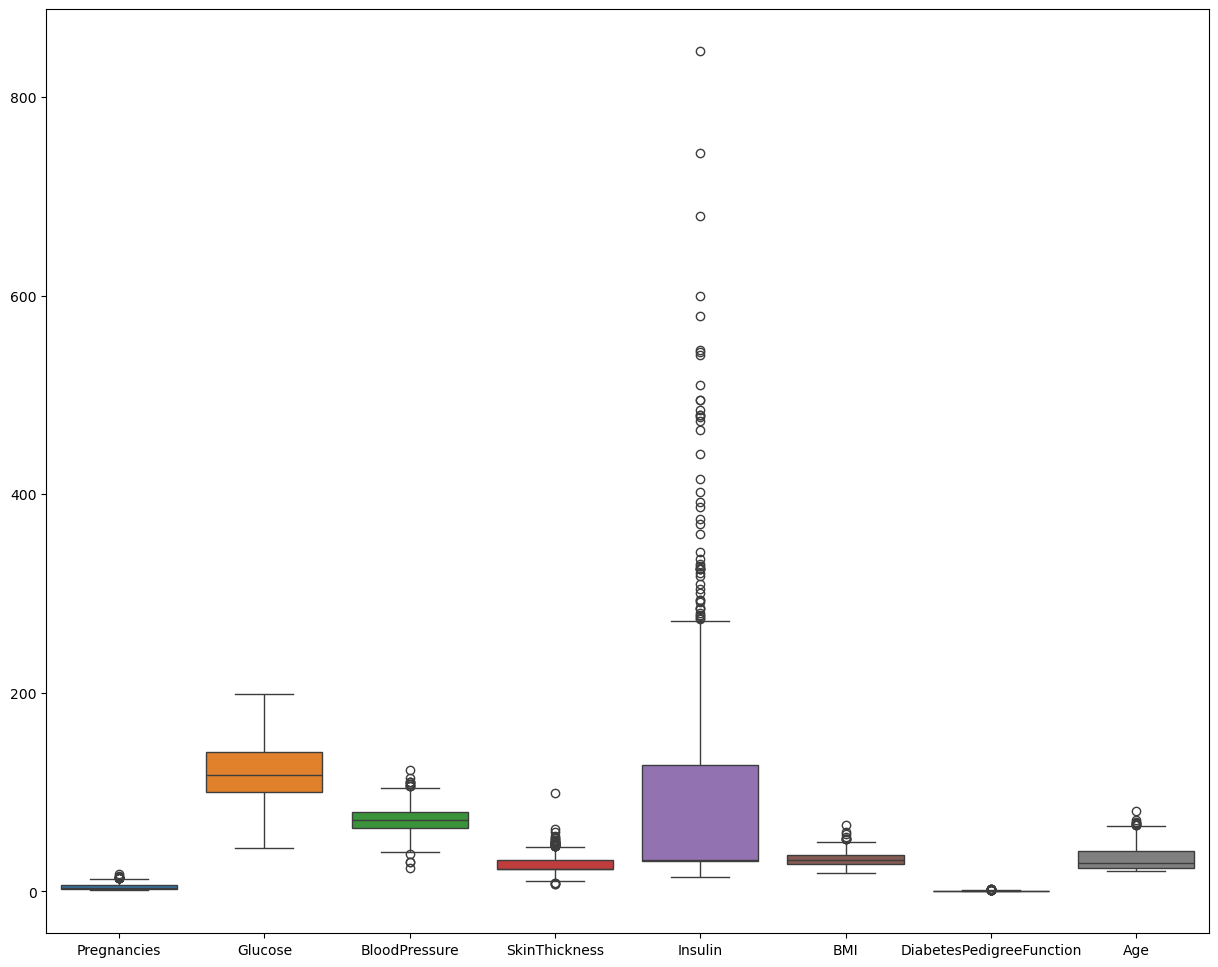

In [34]:
plt.figure(figsize=(15, 12))
plt.savefig('boxplot.png')
sns.boxplot(data=x)

### Standardization of the values in the given features

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.57007018,  0.86527574, -0.03198993, ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-1.08580689, -1.20598931, -0.5283186 , ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23242101,  2.01597855, -0.69376149, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.23889477, -0.02240928, -0.03198993, ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-1.08580689,  0.14197684, -1.02464727, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-1.08580689, -0.94297153, -0.19743282, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [37]:

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
# create data frame
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

x_scaled = pd.DataFrame(x_scaled, columns=cols)

In [39]:
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.570070,0.865276,-0.031990,0.831114,-0.608201,0.167255,0.468492,1.425995
1,-1.085807,-1.205989,-0.528319,0.180566,-0.608201,-0.851535,-0.365061,-0.190672
2,1.232421,2.015979,-0.693761,-0.469981,-0.608201,-1.331821,0.604397,-0.105584
3,-1.085807,-1.074480,-0.528319,-0.469981,-0.006185,-0.633222,-0.920763,-1.041549
4,-0.423456,0.503626,-2.679076,0.831114,0.695378,1.549899,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.894772,-0.679954,0.298896,2.240633,0.809145,0.065376,-0.908682,2.532136
764,-0.754631,0.010468,-0.197433,-0.036283,-0.608201,0.632988,-0.398282,-0.531023
765,0.238895,-0.022409,-0.031990,-0.469981,0.164466,-0.909751,-0.685193,-0.275760
766,-1.085807,0.141977,-1.024647,-0.469981,-0.608201,-0.342140,-0.371101,1.170732


<Axes: >

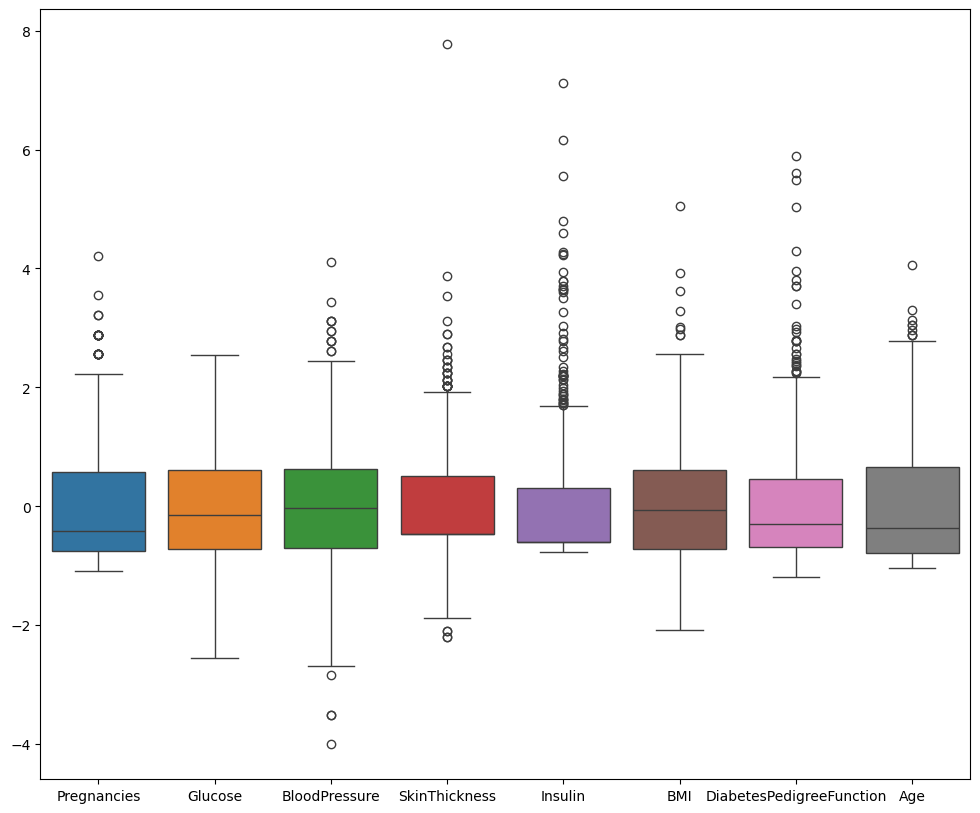

In [40]:
plt.figure(figsize=(12, 10))
plt.savefig('boxplot')
sns.boxplot(data = x_scaled)

## IQR (InterQuartie Range)

#### identitify the outliers

In [41]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

outliers_indices = set()

for col in cols:
    Q1 = x_scaled[col].quantile(0.25)
    Q3 = x_scaled[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    outliers = x_scaled[(x_scaled[col] < lower_whisker) | (x_scaled[col] > upper_whisker)]
    outliers_indices.update(outliers.index.tolist())

# final dataframe of all the outliers
all_outliers = x_scaled.loc[list(outliers_indices)]
all_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,-0.423456,0.503626,-2.679076,0.831114,0.695378,1.549899,5.484909,-0.020496
518,2.888298,-1.501884,-1.024647,-0.469981,-0.608201,0.050822,-0.881501,0.660206
519,0.570070,0.240609,1.456996,-2.204774,2.193308,-1.870325,0.332587,2.276873
8,-0.754631,2.476260,-0.197433,1.915359,4.250593,-0.283923,-0.947944,1.681259
12,1.894772,0.569381,0.629782,-0.469981,-0.608201,-0.778764,2.926869,2.021610
...,...,...,...,...,...,...,...,...
459,1.563596,0.404995,0.133453,0.614265,-0.328524,-0.953414,-0.035868,4.063716
480,-0.423456,1.194048,-0.197433,0.288991,2.212269,0.443784,-0.386202,0.149679
486,-1.085807,0.569381,-0.859204,1.481661,3.653316,1.200600,0.193661,-1.041549
489,1.232421,2.377628,0.629782,-0.469981,-0.608201,-0.924305,0.238963,2.872487


### Data Spliting 

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [44]:
x_train.shape

(614, 8)

In [45]:
x_test.shape

(154, 8)

In [52]:
y_train.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

SMOTE Technique

In [47]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(random_state=42)
x_train, y_train = SMOTE.fit_resample(x_train, y_train)

In [51]:
y_train

0      0
1      1
2      0
3      0
4      1
      ..
797    1
798    1
799    1
800    1
801    1
Name: Outcome, Length: 802, dtype: int64

In [49]:
y_train.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

### Model Training: Implement Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
classification_model = LogisticRegression()
classification_model.fit(x_train, y_train)

LogisticRegression()

### Model Prediction

In [55]:
y_prediction = classification_model.predict(x_test)
y_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

### Model Evalution

In [56]:
from sklearn.metrics import accuracy_score, recall_score
accuracy = accuracy_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)

print("Accuracy :", accuracy)
print("Recall :", recall)

Accuracy : 0.7012987012987013
Recall : 0.6909090909090909


In [ ]:
##### @ngaj kumar 29-10-2025